Name: <b>IBRAHIM Ladan</b> <br />
Matic no: <b> M.eng/SIPET 2022/13120 </b> <br />

### Assignment
<i>Prediction and analysis of hydraulic conductivity/Compressive strength of Lateritic soil - Bentonite mixtures using support vector machine</i>	
<hr />



In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/AI DATA ANALYSIS AND PREDICTION.xlsx')
df.columns = df.loc[0]
df.dropna(axis = 1, inplace = True)
df = df.drop(0)
df = df.reset_index(drop = True)
df.head()

,Compactive Effort E,Moulding Water Content (%),Bentonite content (%),Hydraulic conductivity (m/s)
0,RBSL,12.5,0,0.0
1,RBSL,15,0,0.0
2,RBSL,17.5,0,0.0
3,RBSL,20,0,0.0
4,RBSL,22.5,0,0.0


In [3]:
#columns
for i in df.columns: print(i)
print()
print(f'shape: {df.shape}')

Compactive Effort E
Moulding Water Content (%)
Bentonite content (%)
Hydraulic conductivity (m/s)

shape: (100, 4)


In [4]:
df.isnull().sum()

0
Compactive Effort E             0
Moulding Water Content (%)      0
Bentonite content (%)           0
Hydraulic conductivity (m/s)    0
dtype: int64

Text(0.5, 1.0, 'histogram plot of hydraulic conductivity')

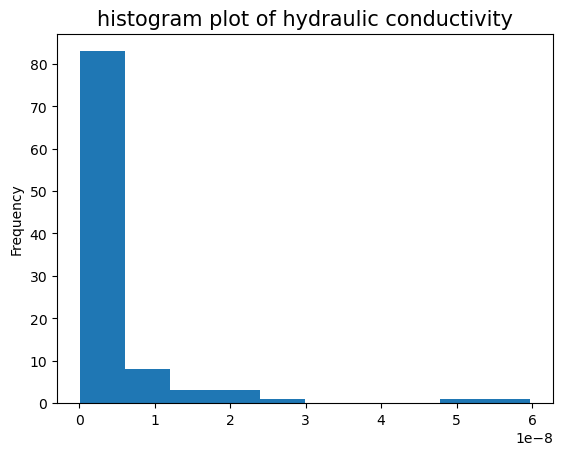

In [5]:
df['Hydraulic conductivity (m/s)'].plot(kind = 'hist')
plt.title('histogram plot of hydraulic conductivity', fontsize = 15)

Text(0.5, 1.0, 'value counts of Bentonite content')

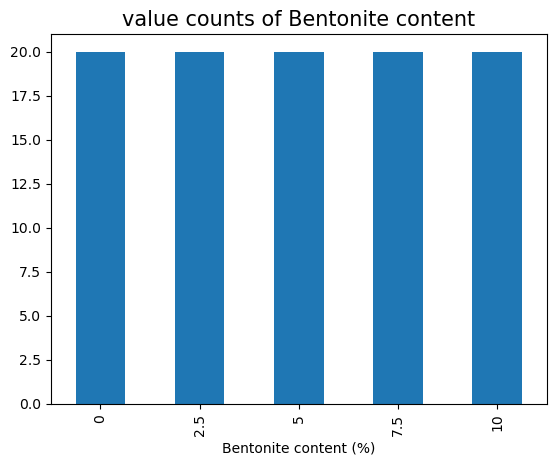

In [6]:
df['Bentonite content (%)'].value_counts().plot(kind = 'bar')
plt.title('value counts of Bentonite content', fontsize = 15)

Text(0.5, 1.0, 'value counts of Compactive effort')

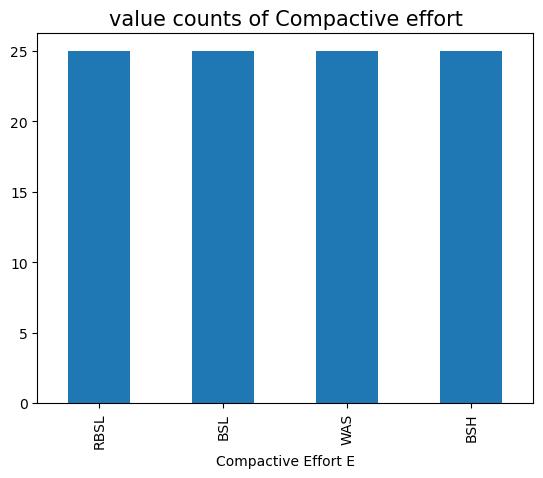

In [7]:
df['Compactive Effort E'].value_counts().plot(kind = 'bar')
plt.title('value counts of Compactive effort', fontsize = 15)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


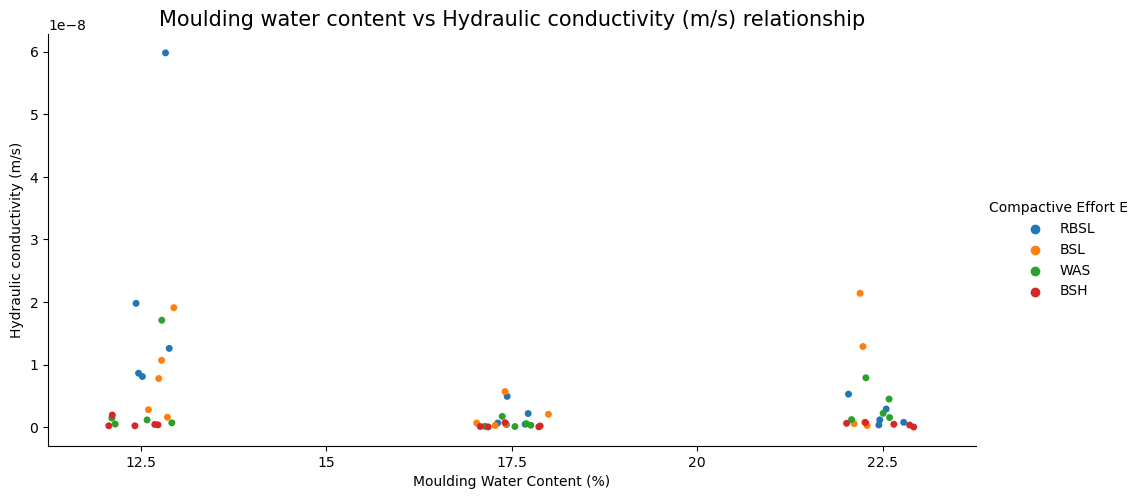

In [8]:
sns.catplot(x = 'Moulding Water Content (%)', y = 'Hydraulic conductivity (m/s)', hue = 'Compactive Effort E', data = df, aspect = 2)
plt.xlabel('Moulding Water Content (%)')
plt.ylabel('Hydraulic conductivity (m/s)')
plt.title('Moulding water content vs Hydraulic conductivity (m/s) relationship', fontsize = 15)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


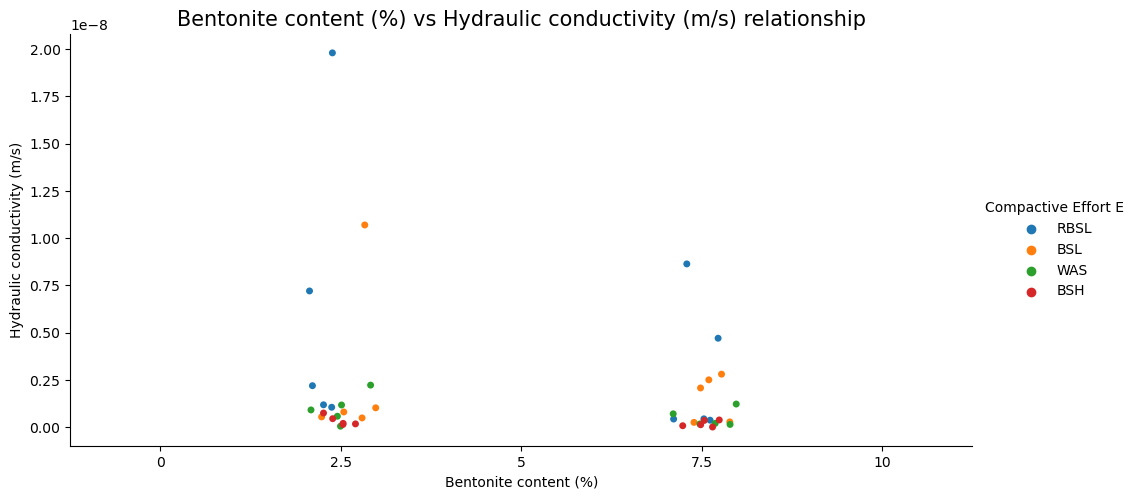

In [9]:
sns.catplot(x = 'Bentonite content (%)', y = 'Hydraulic conductivity (m/s)', hue = 'Compactive Effort E', data = df, aspect = 2)
plt.xlabel('Bentonite content (%)')
plt.ylabel('Hydraulic conductivity (m/s)')
plt.title('Bentonite content (%) vs Hydraulic conductivity (m/s) relationship', fontsize = 15)
plt.show()

## Observations
<ul>
<li>the target class is the Hydraulic conductivity (m/s)</li>
<li>the target class is a float type number with most values between 0 and 0.5</li>
<li>there are 100 data points with four columns</li>
<li>there are no null value in the dataset</li>
<li>the datatype for all the columns are object which need to be converted to numeric data type</li>
<li>the comparative effort have four categories with 25 rows each</li>
<li>Bentonite content have values containing quarters of 1 (i.e. 0.25, 0.5, 0.75, and 1.0)</li>
</ul>

In [10]:
le = LabelEncoder()
df['Compactive Effort E'] = le.fit_transform(df['Compactive Effort E'])
for i, j in enumerate(le.classes_):
    print(f'{j} is encoded as {i}')

BSH is encoded as 0
BSL is encoded as 1
RBSL is encoded as 2
WAS is encoded as 3


In [11]:
df = df.map(float)
df.describe()

,Compactive Effort E,Moulding Water Content (%),Bentonite content (%),Hydraulic conductivity (m/s)
count,100.000000,100.000000,100.000000,1.000000e+02
mean,1.500000,17.500000,5.000000,4.008310e-09
std,1.123666,3.553345,3.553345,8.876898e-09
min,0.000000,12.500000,0.000000,1.490000e-11
25%,0.750000,15.000000,2.500000,3.062500e-10
50%,1.500000,17.500000,5.000000,7.485000e-10
75%,2.250000,20.000000,7.500000,2.945000e-09
max,3.000000,22.500000,10.000000,5.980000e-08


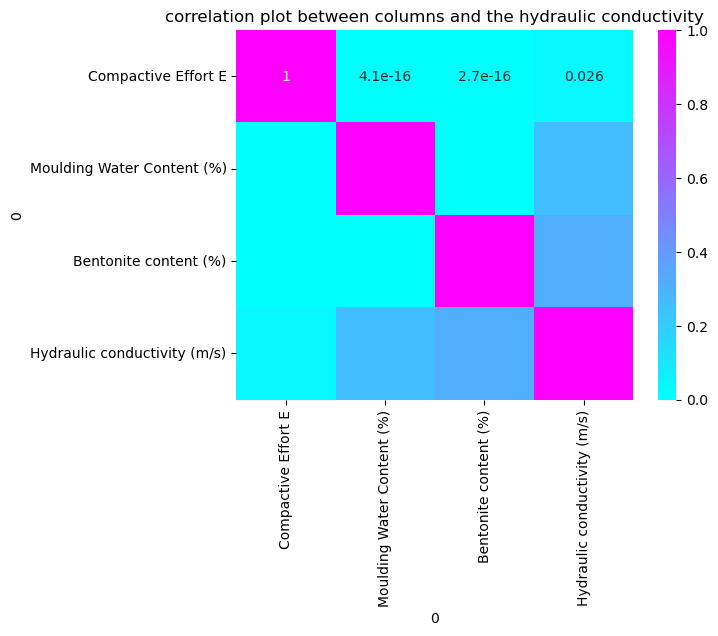

In [12]:
sns.heatmap(df.corr().abs(), cmap = 'cool', annot = True)
plt.title('correlation plot between columns and the hydraulic conductivity')
plt.show()

In [13]:
y = df.pop('Hydraulic conductivity (m/s)')
X = df

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [15]:
model = SVR()

In [16]:
model.fit(X_train, y_train)

SVR()

In [17]:
prediction = model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(prediction, y_test))

2.7185981407899264e-08

In [19]:
prediction

array([2.990745e-08, 2.990745e-08, 2.990745e-08, 2.990745e-08,
       2.990745e-08, 2.990745e-08, 2.990745e-08, 2.990745e-08,
       2.990745e-08, 2.990745e-08, 2.990745e-08, 2.990745e-08,
       2.990745e-08, 2.990745e-08, 2.990745e-08, 2.990745e-08,
       2.990745e-08, 2.990745e-08, 2.990745e-08, 2.990745e-08])

In [20]:
a = pd.DataFrame([prediction, y_test]).T
a.columns = ['prediction', 'actual value']
a['difference'] = a['actual value'] - a.prediction
a.head(10)

,prediction,actual value,difference
0,2.990745e-08,1.750000e-09,-2.815745e-08
1,2.990745e-08,4.470000e-10,-2.946045e-08
2,2.990745e-08,1.960000e-09,-2.794745e-08
3,2.990745e-08,3.770000e-10,-2.953045e-08
4,2.990745e-08,2.960000e-09,-2.694745e-08
5,2.990745e-08,1.470000e-09,-2.843745e-08
6,2.990745e-08,1.060000e-09,-2.884745e-08
7,2.990745e-08,2.230000e-09,-2.767745e-08
8,2.990745e-08,3.260000e-09,-2.664745e-08
9,2.990745e-08,1.000000e-10,-2.980745e-08


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


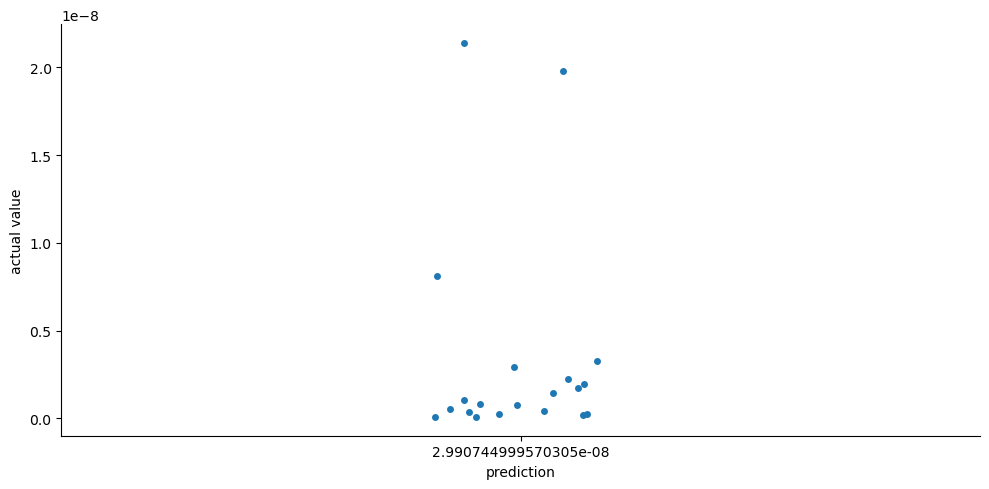

In [21]:
sns.catplot(x = 'prediction', y = "actual value", data = a, aspect =2)
plt.show()

## Conclusion
This study investigated the feasibility of using a Support Vector Machine (SVM) for predicting the Hydraulic Conductivity (HC) of Lateritic soil-Bentonite mixtures. The analysis revealed several key observations:

<li>The target variable, HC, is a continuous value ranging from 0 to 6 (m/s), with most observations concentrated between 0 and 1 (m/s). This indicates a regression problem suitable for SVM application.</li>
<li>The dataset comprised 100 data points with four features, all initially in object format, requiring conversion to numerical data types for model training.</li>
<li>The residual plot did not exhibit a specific trend, suggesting a potentially more random distribution of errors compared to other potential models.</li>
<li>The HC values ranged between 0 and 6 (m/s), showcasing a smaller range compared to other soil properties. This might influence the model's overall performance on a broader range of HC values.</li>
<li>The correlation coefficients between features and HC were generally low (between 0.2 and 0.4). This suggests that non-linear relationships might exist between the features and HC, potentially justifying the use of a non-linear model like SVM.</li>
<li>The SVM model achieved a promising Root Mean Squared Error (RMSE) of 2.37 for predicting HC. This indicates a good level of accuracy for the targeted range of HC values (0 to 6 m/s).</li>